## Functions

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def plot_relative_abundance(df, num_reads, method):
    # Filter and group the DataFrame
    filtered_df = df[df["Domain"].isin(["Bacteria", "Eukaryota", "unclassified"]) & df["Domain"].notnull() & (df["estimated_number_of_reads_from_the_clade"] > num_reads) & (df["relative_abundance"] > 0)]
    filtered_df = filtered_df.groupby(['sample', "Domain"])['relative_abundance'].sum().reset_index()

    # Pivot and normalize the DataFrame
    filtered_df = filtered_df.pivot(index='sample', columns="Domain", values='relative_abundance')
    filtered_df = filtered_df.apply(lambda row: 100. * row / row.sum(), axis=1)
    filtered_df = filtered_df.fillna(0)

    # Get the colormap
    colormap = plt.get_cmap('tab20', len(filtered_df.columns))

    # Plot
    filtered_df.plot(kind='bar', stacked=True, figsize=(10,7), edgecolor='black', color=[colormap(i) for i in range(len(filtered_df.columns))])
    plt.title(f'Relative Abundance per Sample ({method})')
    plt.xlabel('Sample')
    plt.ylabel('Relative Abundance')
    plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [4]:
def plot_relative_abundance_bacteria(df, column, min_reads, method):
    filtered_df = df[(df["Domain"] == "Bacteria") & (df[column].notnull()) & (df["estimated_number_of_reads_from_the_clade"] > min_reads) & (df["relative_abundance"] > 0)]
    # Aggregate the data
    filtered_df = filtered_df.groupby(['sample', column])['relative_abundance'].sum().reset_index()
    filtered_df = filtered_df.pivot(index='sample', columns=column, values='relative_abundance')
    filtered_df = filtered_df.apply(lambda row: 100. * row / row.sum(), axis=1)
    # Fill NaN values with 0
    filtered_df = filtered_df.fillna(0)
    # Create a colormap
    colormap = plt.get_cmap('tab20', len(filtered_df.columns))
    # Plot
    filtered_df.plot(kind='bar', stacked=True, figsize=(10,7), edgecolor='black', color=[colormap(i) for i in range(len(filtered_df.columns))])
    plt.title(f'Relative Abundance per Sample ({method})')
    plt.xlabel('Sample')
    plt.ylabel('Relative Abundance')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

In [5]:
def create_clustermap(df, num_reads, method):
    # Filter and pivot the DataFrame
    filtered_df = df[(df["Domain"] == "Bacteria") & (df["relative_abundance"] > 0.0) & (df["estimated_number_of_reads_from_the_clade"] > num_reads)]
    pivot_df = filtered_df.pivot_table(index='Species', columns='sample', values='relative_abundance', aggfunc='sum')

    # Replace NaN values with 0
    pivot_df = pivot_df.fillna(0)

    # Drop constant columns
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    # Create the clustermap
    g = sns.clustermap(np.log1p(pivot_df), cmap='viridis', standard_scale=1)

    # Add a title
    plt.suptitle(f'Species relative abundance ({method})', y=1.01)

    return g

## Kraken2

In [6]:
kraken2_bowtie = pd.read_csv("../../results/Kraken2/metaphlan_style_reports/kraken2_output_merged.csv")
kraken2_bowtie

,sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,relative_abundance,estimated_number_of_reads_from_the_clade
0,0010018_Burn_034_RightLeg1,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.89,220170
1,0010018_Burn_034_RightLeg1,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.11,7398610
2,0010018_Burn_034_RightLeg1,cellular_organisms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.08,7396414
3,0010018_Burn_034_RightLeg1,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.70,7367426
4,0010018_Burn_034_RightLeg1,Opisthokonta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.57,7205219
...,...,...,...,...,...,...,...,...,...,...,...
7153,0010006_Burn_030_RightLeg,Viruses,Pararnavirae,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,NaN,0.00,6
7154,0010006_Burn_030_RightLeg,Viruses,Pararnavirae,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,Kirsten_murine_sarcoma_virus,0.00,2
7155,0010006_Burn_030_RightLeg,unclassified_Gammaretrovirus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
7156,0010006_Burn_030_RightLeg,Viruses,Pararnavirae,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,Spleen_focus-forming_virus,0.00,1


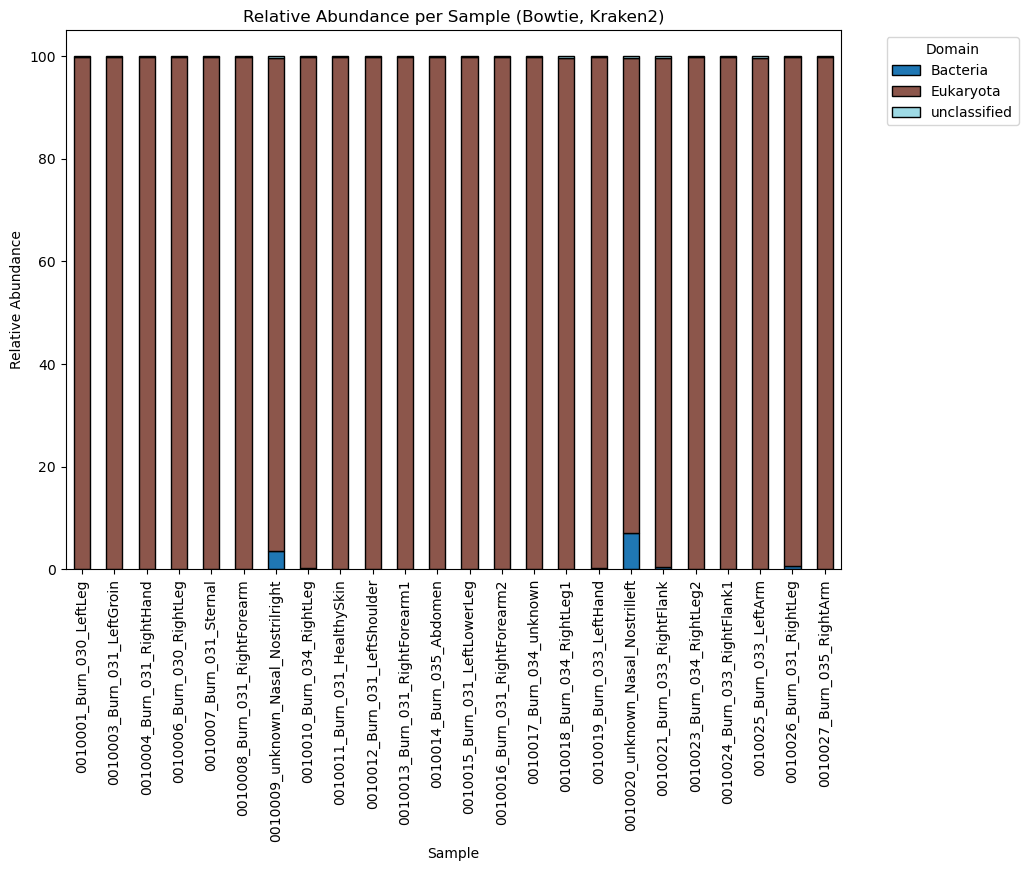

In [7]:
plot_relative_abundance(kraken2_bowtie, 10, "Bowtie, Kraken2")

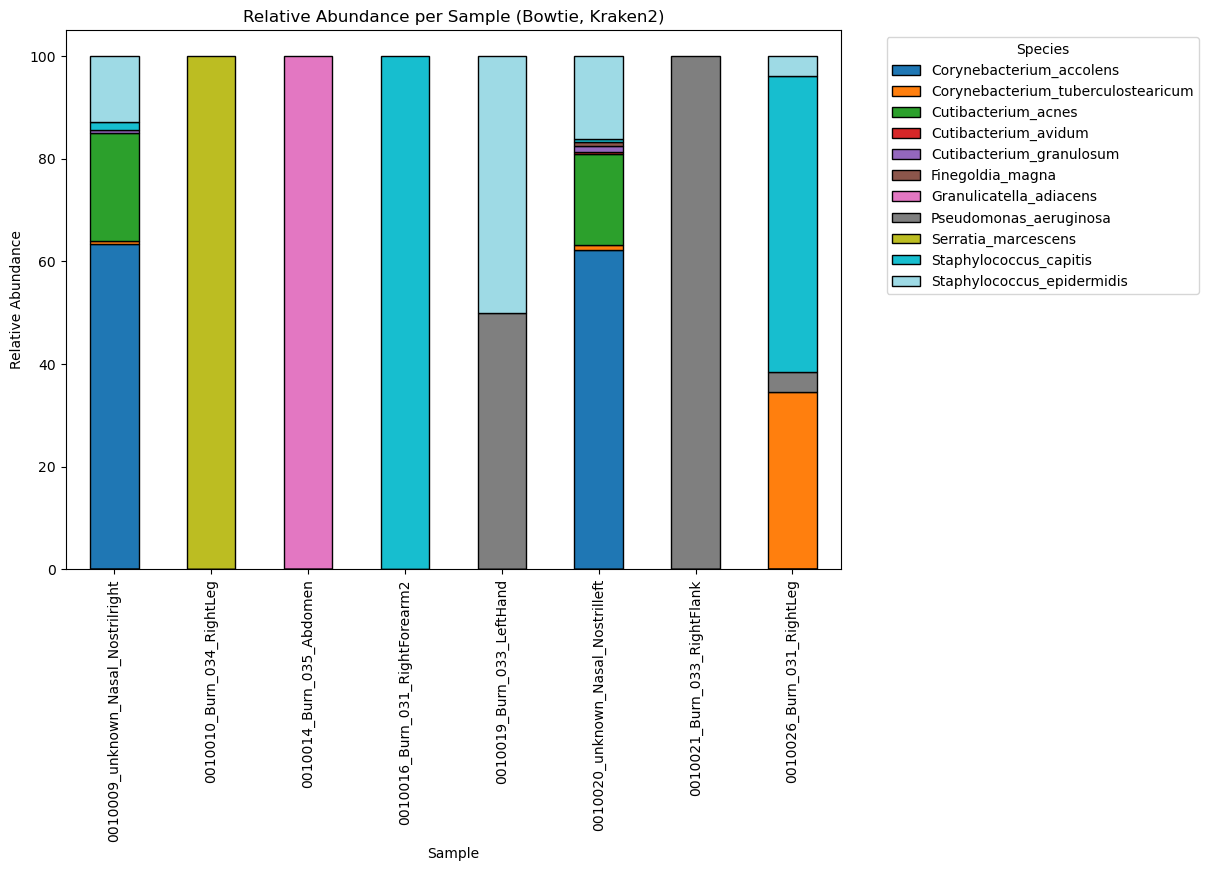

In [8]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Species", 10, "Bowtie, Kraken2")

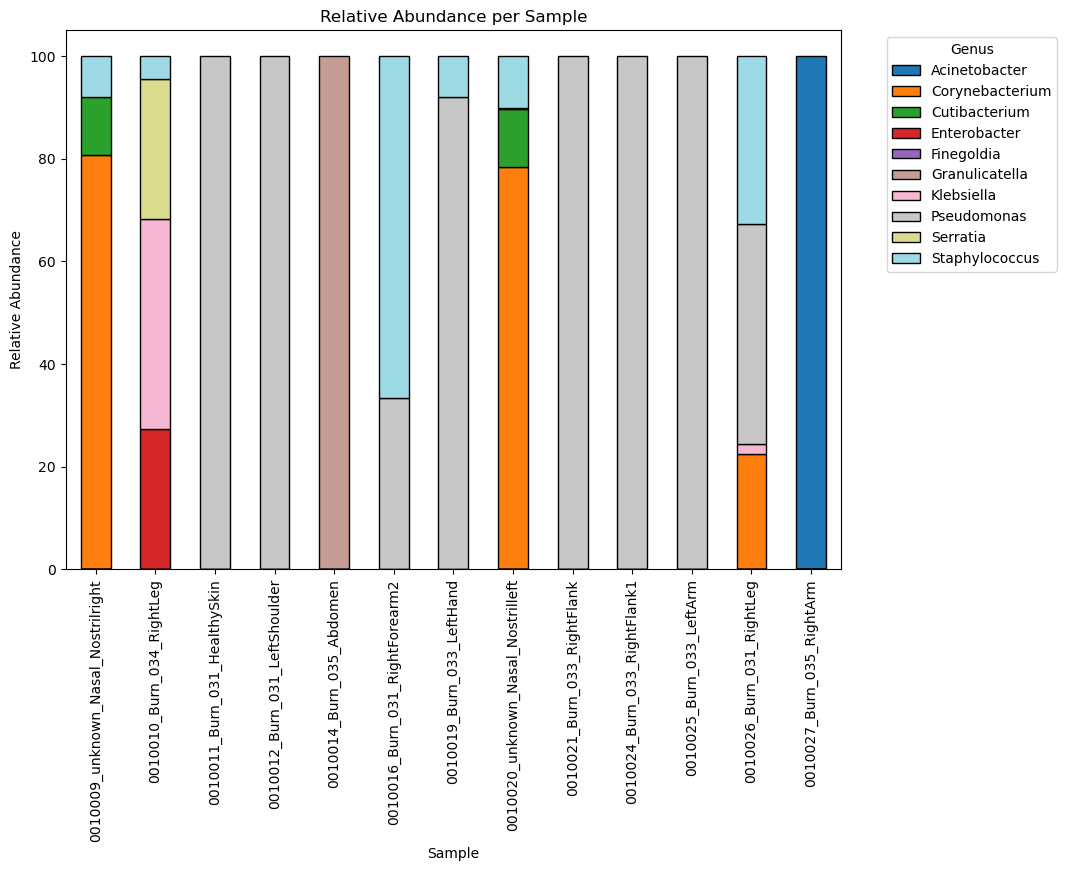

In [83]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Genus", 10)

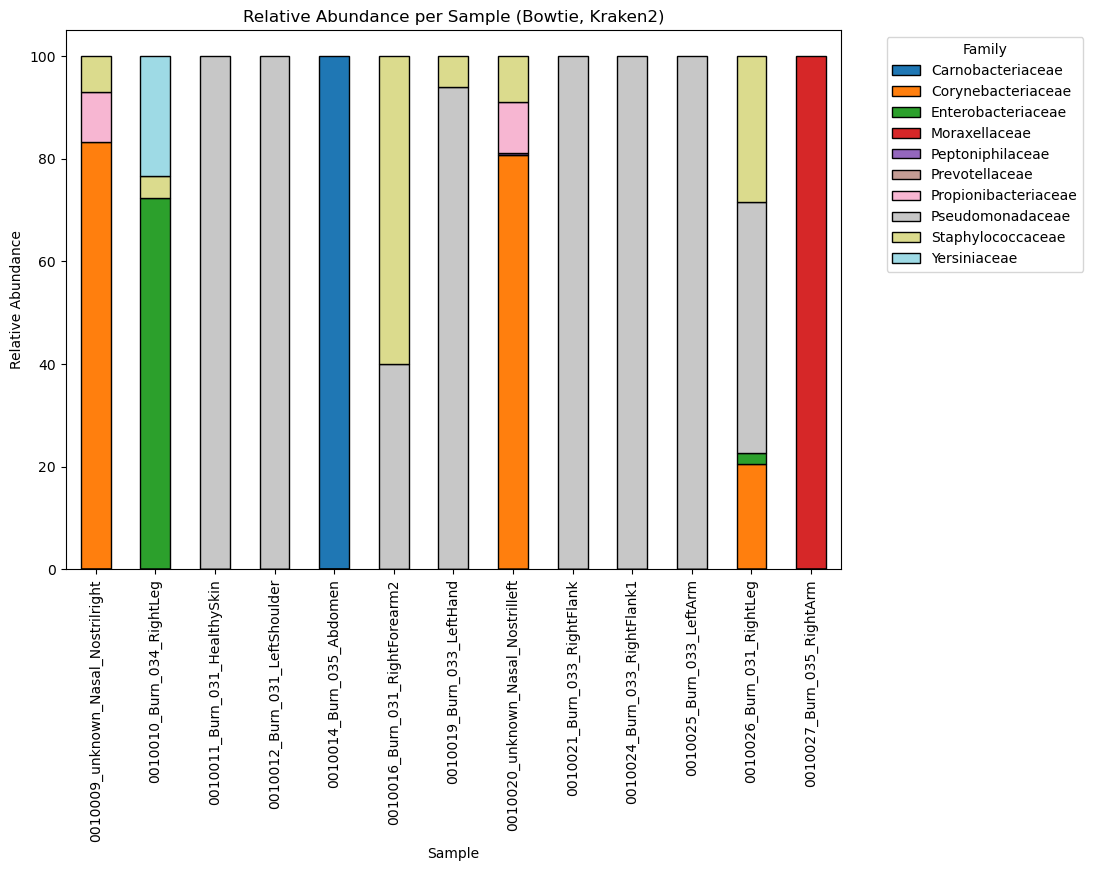

In [9]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Family", 10, "Bowtie, Kraken2")

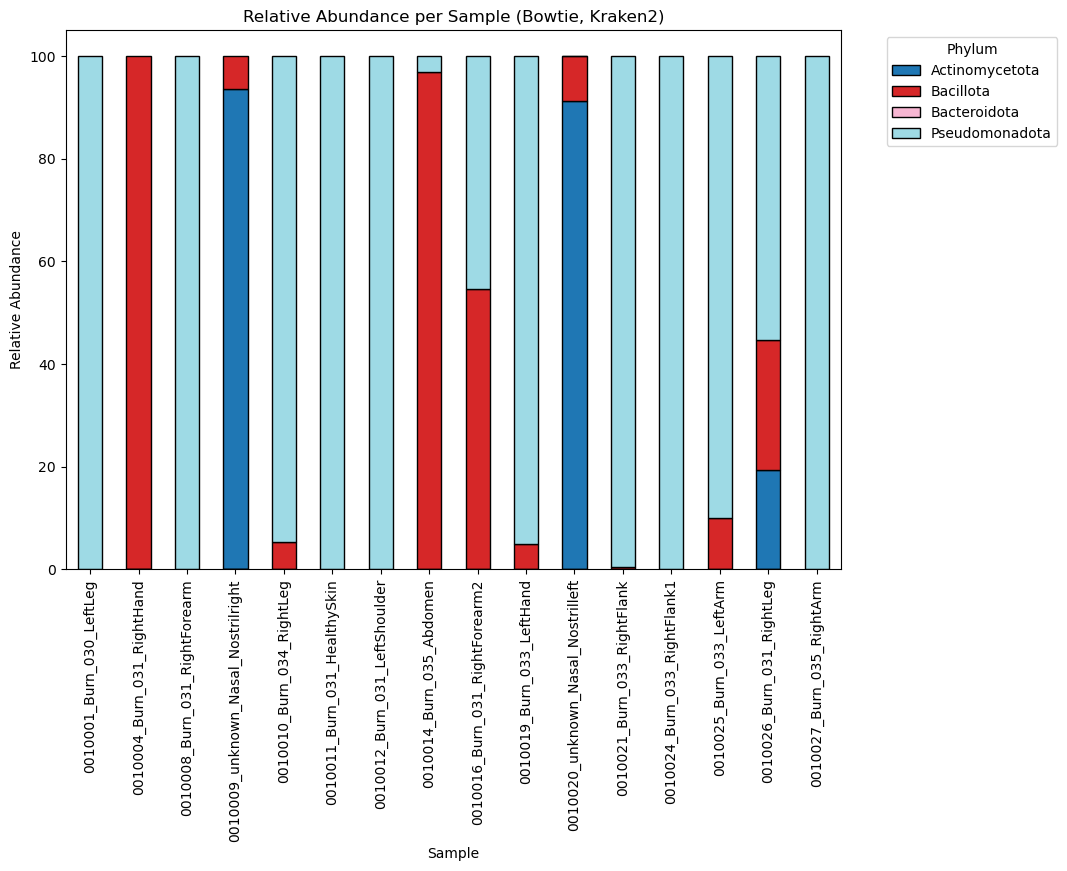

In [10]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Phylum", 10, "Bowtie, Kraken2")

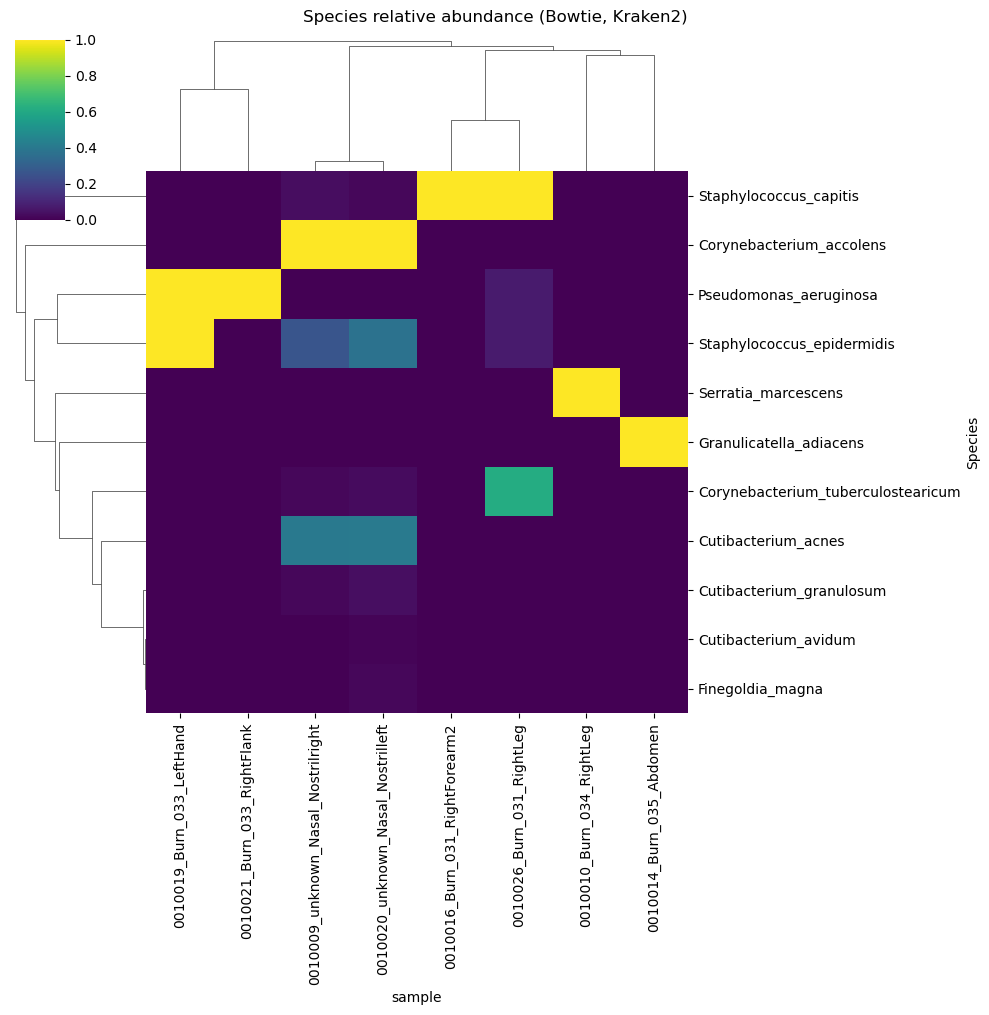

In [11]:
create_clustermap(kraken2_bowtie, 10, "Bowtie, Kraken2")

## MetaPhlAn4

### Bowtie

In [12]:
metaphlan_bowtie = pd.read_csv("../../results/MetaPhlAn4/metaphlan_output_merged.csv")
metaphlan_bowtie 

,sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,relative_abundance,estimated_number_of_reads_from_the_clade
0,0010003_Burn_031_LeftGroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
1,0010001_Burn_030_LeftLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
2,0010018_Burn_034_RightLeg1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
3,0010004_Burn_031_RightHand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
4,0010016_Burn_031_RightForearm2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
...,...,...,...,...,...,...,...,...,...,...,...
206,0010020_unknown_Nasal_Nostrilleft,Bacteria,NaN,Firmicutes,Tissierellia,Tissierellales,Peptoniphilaceae,Finegoldia,Finegoldia_magna,0.53232,4399
207,0010020_unknown_Nasal_Nostrilleft,Bacteria,NaN,Firmicutes,CFGB1195,OFGB1195,FGB1195,GGB2949,GGB2949_SGB6657,0.47986,3659
208,0010020_unknown_Nasal_Nostrilleft,Bacteria,NaN,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_capitis,0.11414,1314
209,0010015_Burn_031_LeftLowerLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0


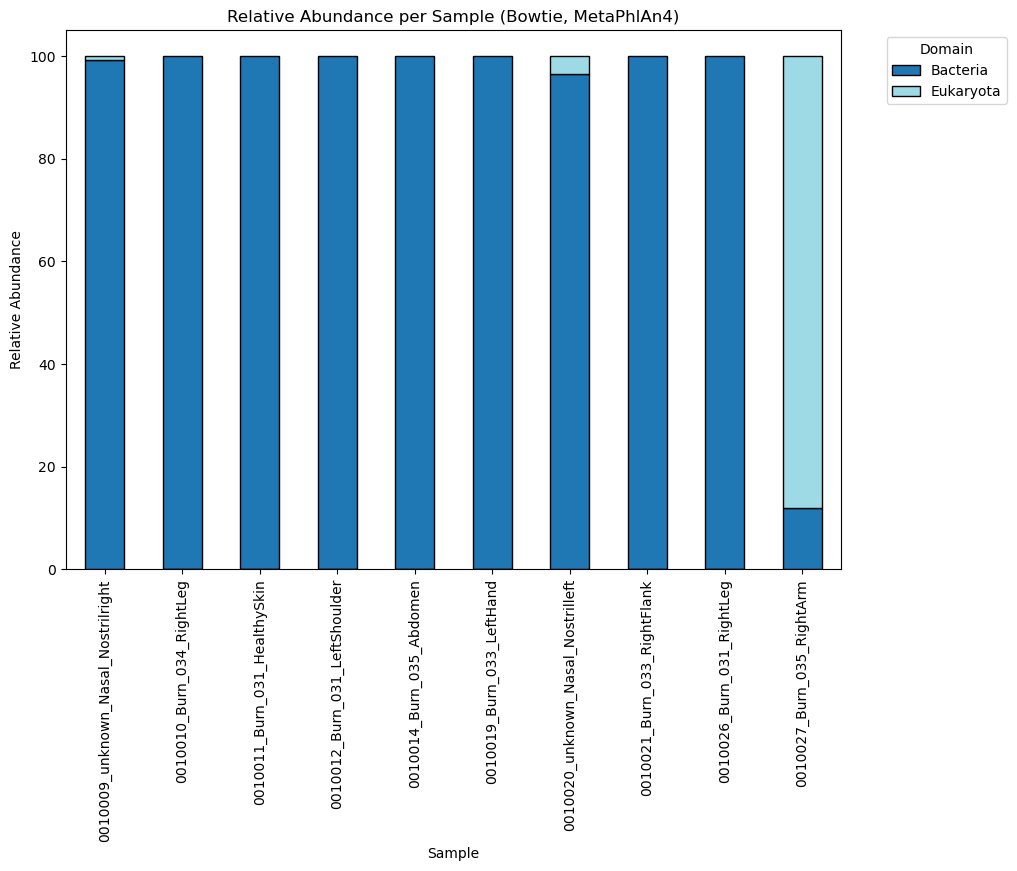

In [19]:
plot_relative_abundance(metaphlan_bowtie, 10, "Bowtie, MetaPhlAn4")

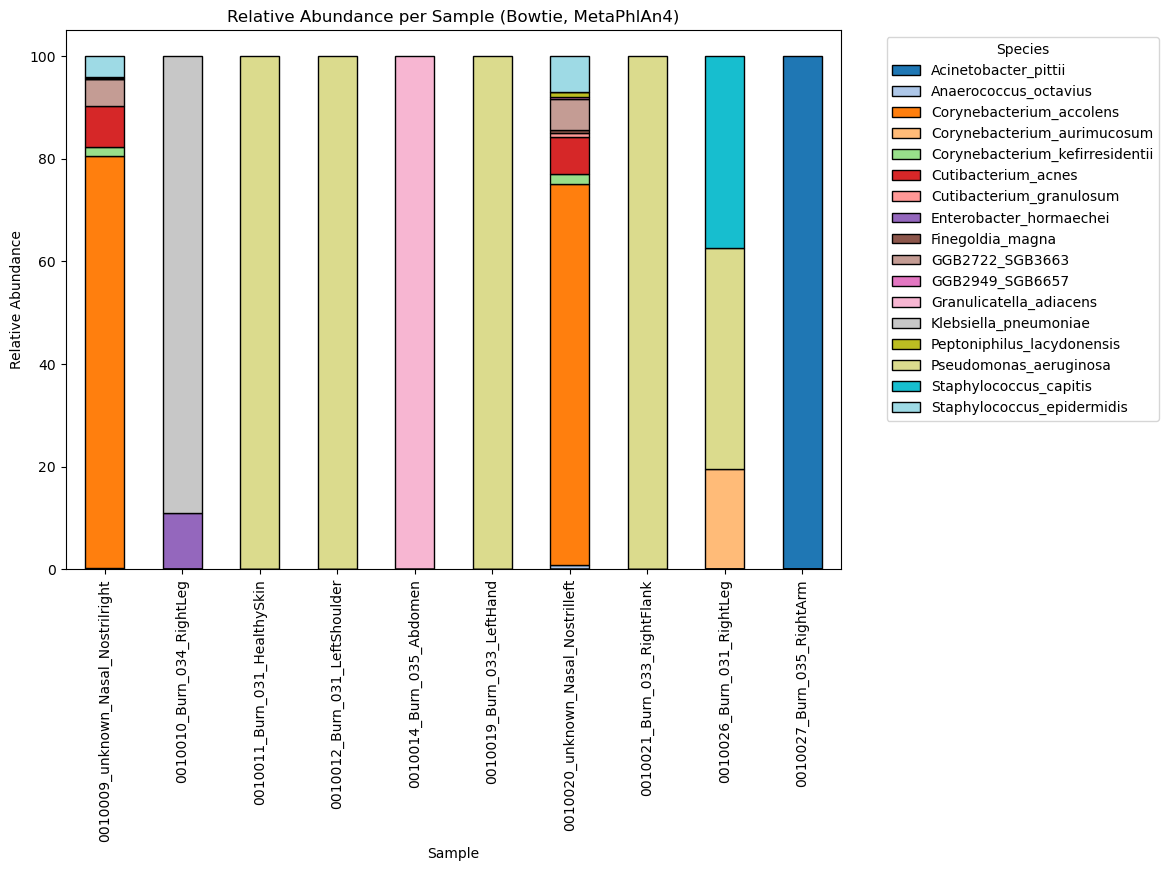

In [20]:
plot_relative_abundance_bacteria(metaphlan_bowtie, "Species", 10, "Bowtie, MetaPhlAn4")

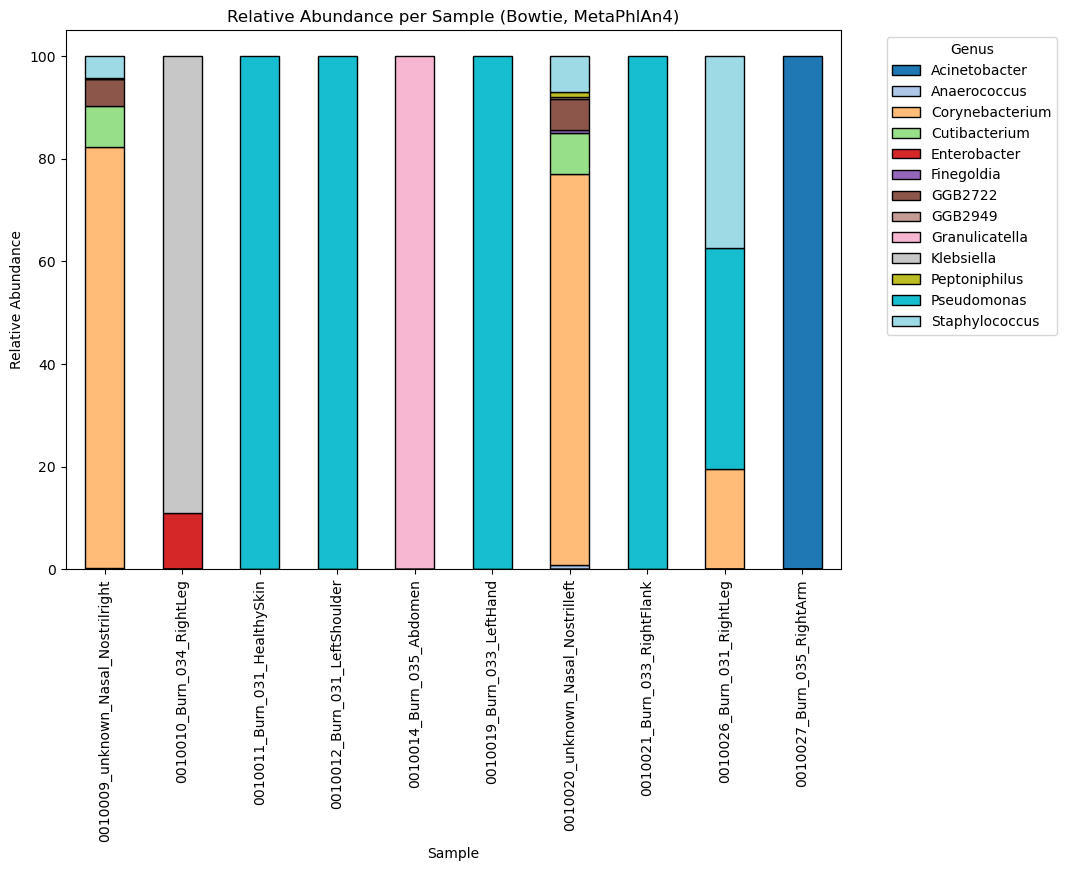

In [21]:
plot_relative_abundance_bacteria(metaphlan_bowtie, "Genus", 10, "Bowtie, MetaPhlAn4")

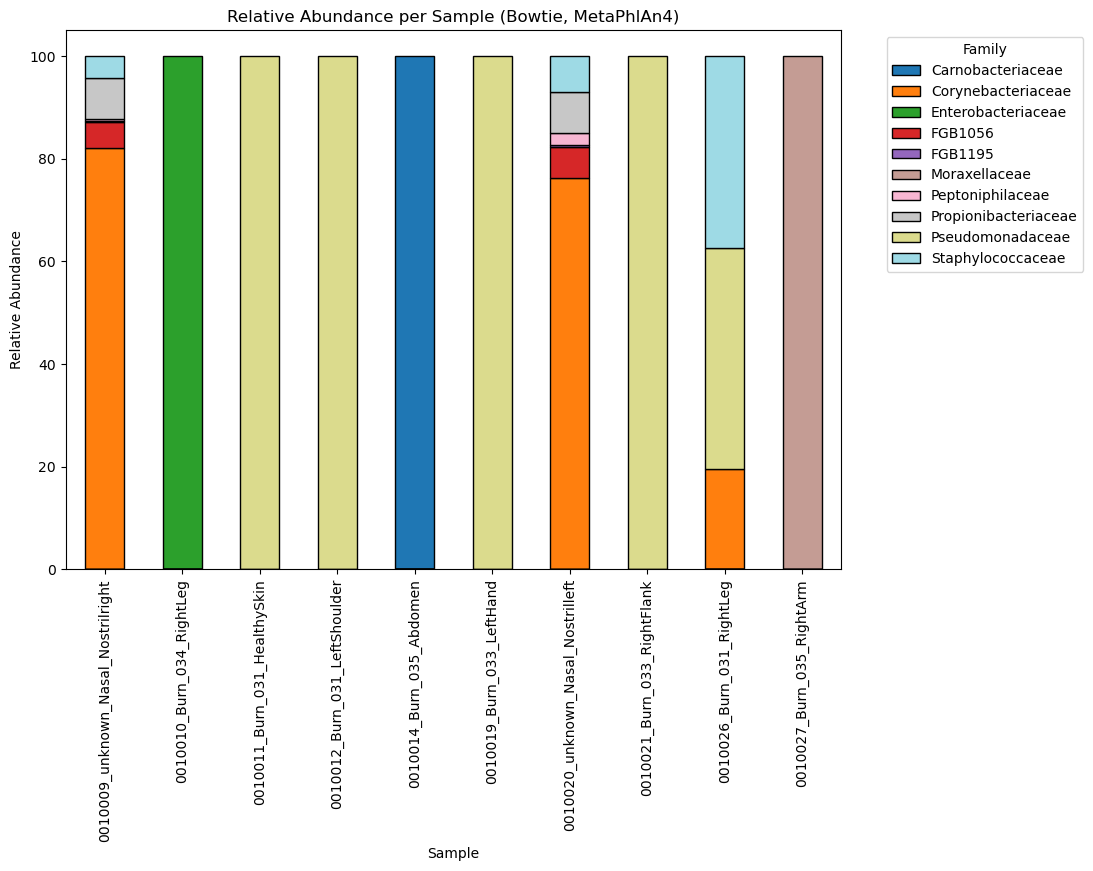

In [22]:
plot_relative_abundance_bacteria(metaphlan_bowtie, "Family", 10, "Bowtie, MetaPhlAn4")

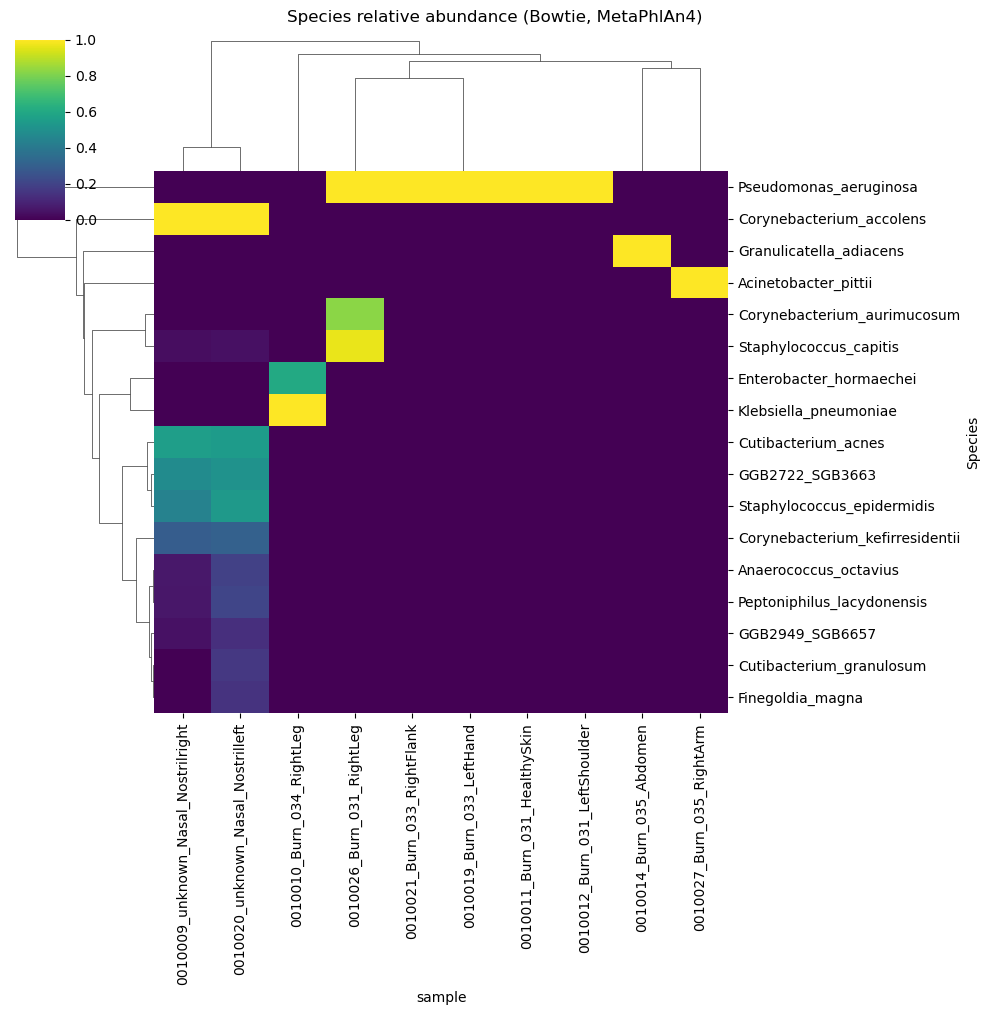

In [23]:
create_clustermap(metaphlan_bowtie, 10, "Bowtie, MetaPhlAn4")

### BBMap

In [24]:
metaphlan_bbmap = pd.read_csv("../../results/MetaPhlAn4_bbmap/metaphlan_output_merged.csv")
metaphlan_bbmap

,sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,relative_abundance,estimated_number_of_reads_from_the_clade
0,0010003_Burn_031_LeftGroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
1,0010001_Burn_030_LeftLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
2,0010018_Burn_034_RightLeg1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
3,0010004_Burn_031_RightHand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
4,0010016_Burn_031_RightForearm2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
...,...,...,...,...,...,...,...,...,...,...,...
206,0010020_unknown_Nasal_Nostrilleft,Bacteria,NaN,Firmicutes,Tissierellia,Tissierellales,Peptoniphilaceae,Finegoldia,Finegoldia_magna,0.50468,3983
207,0010020_unknown_Nasal_Nostrilleft,Bacteria,NaN,Firmicutes,CFGB1195,OFGB1195,FGB1195,GGB2949,GGB2949_SGB6657,0.45806,3336
208,0010020_unknown_Nasal_Nostrilleft,Bacteria,NaN,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_capitis,0.09991,1098
209,0010015_Burn_031_LeftLowerLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0


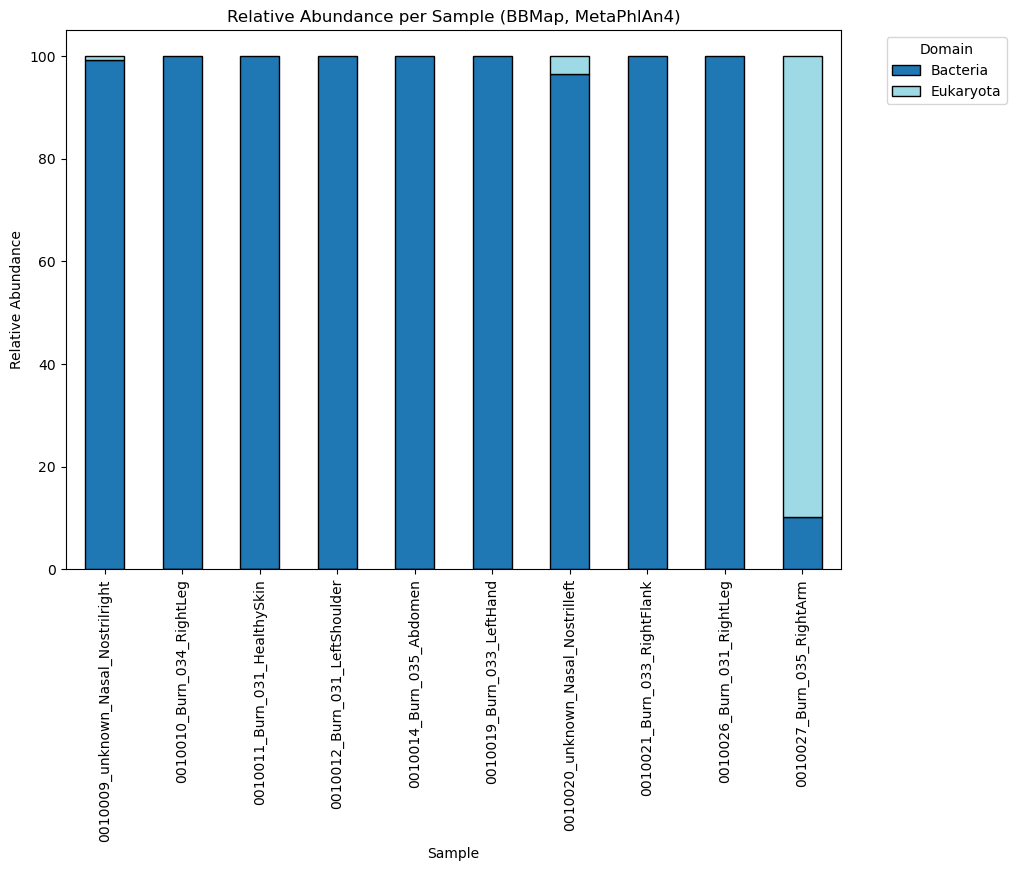

In [25]:
plot_relative_abundance(metaphlan_bbmap, 10, "BBMap, MetaPhlAn4")

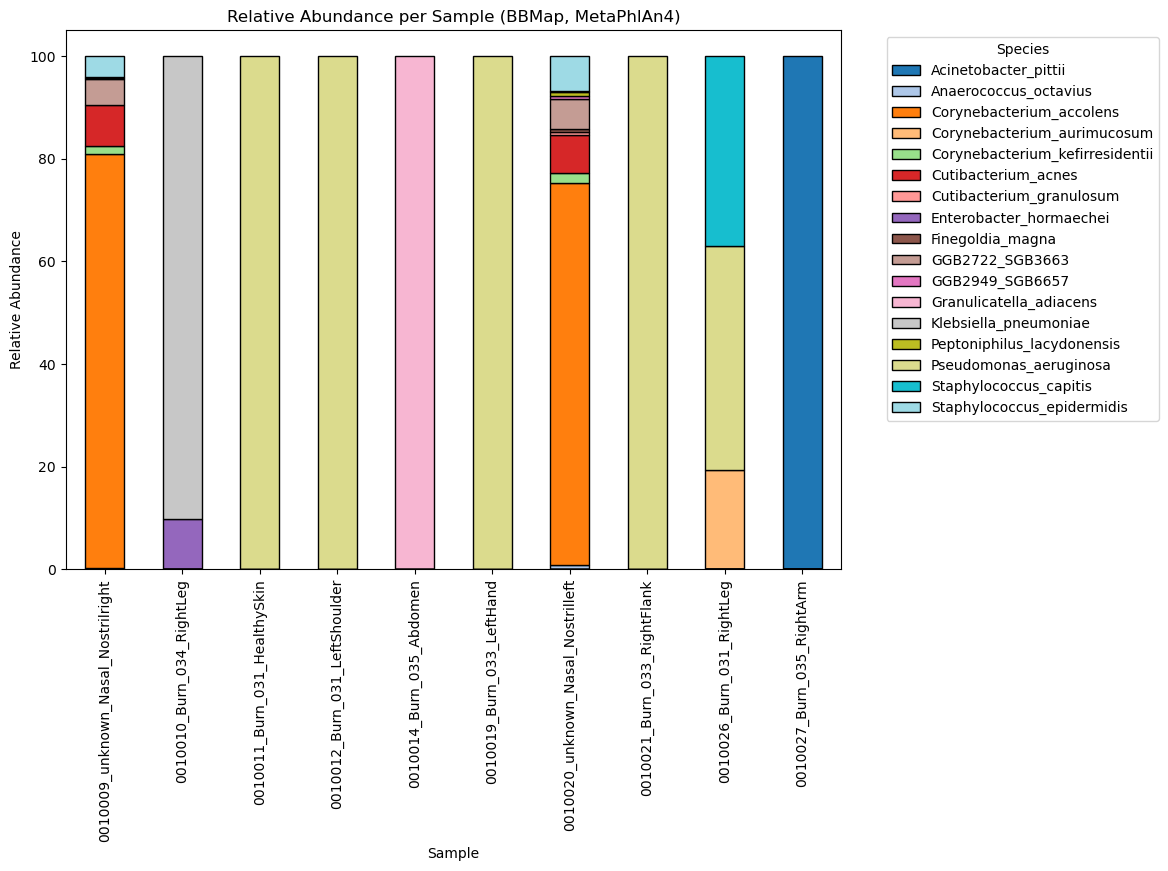

In [26]:
plot_relative_abundance_bacteria(metaphlan_bbmap, "Species", 10, "BBMap, MetaPhlAn4")

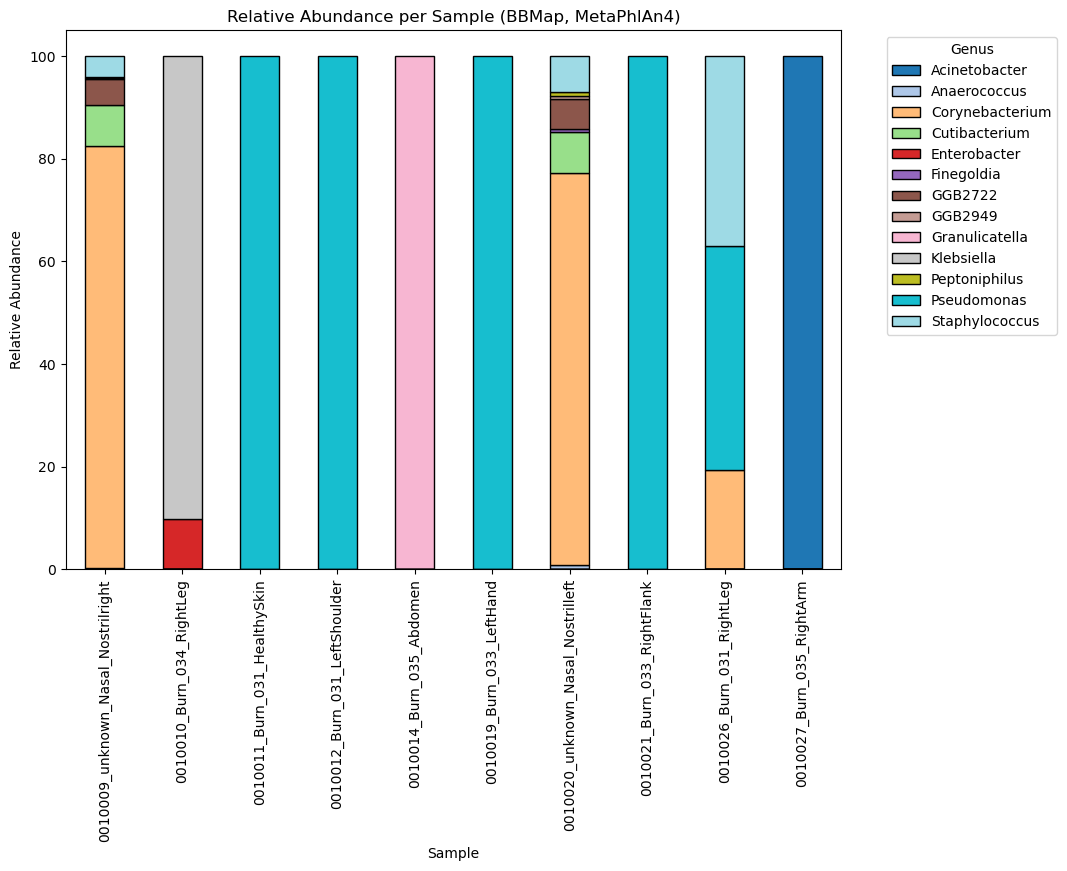

In [27]:
plot_relative_abundance_bacteria(metaphlan_bbmap, "Genus", 10, "BBMap, MetaPhlAn4")

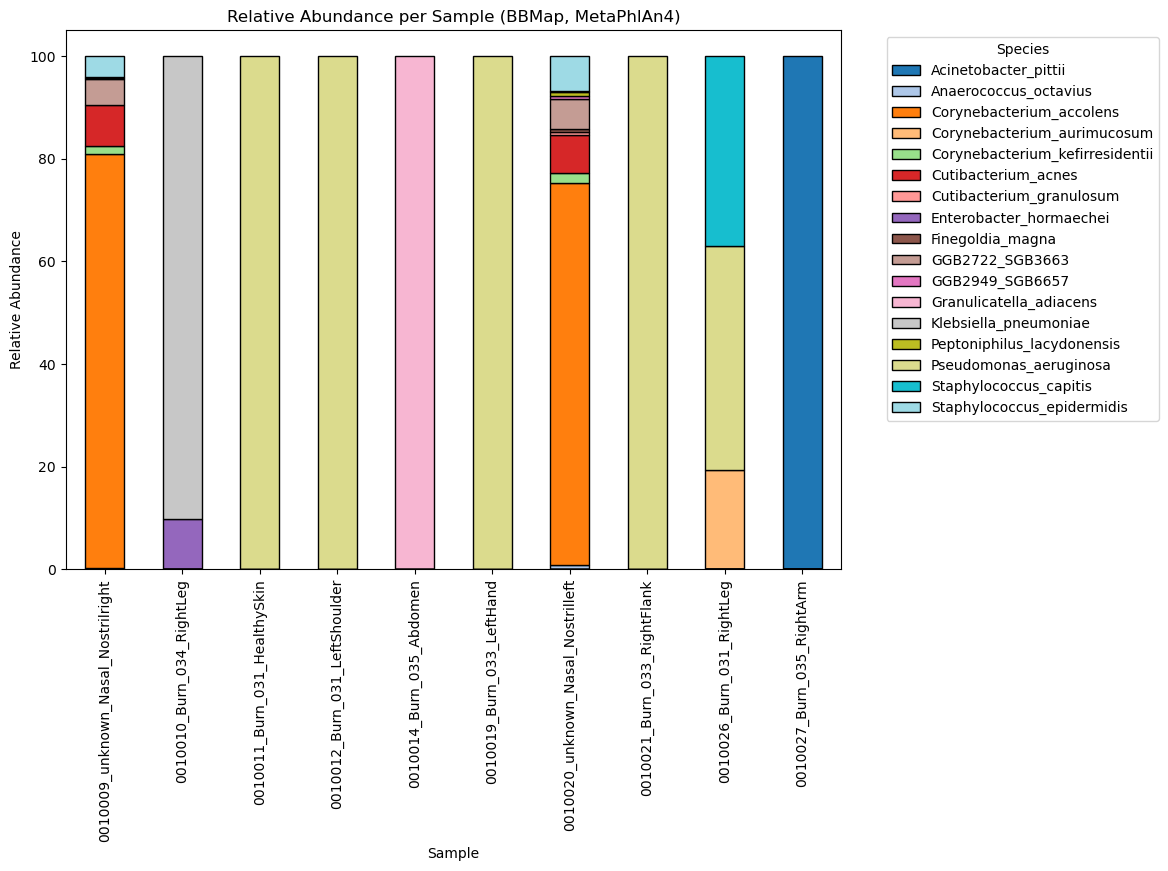

In [28]:
plot_relative_abundance_bacteria(metaphlan_bbmap, "Species", 10, "BBMap, MetaPhlAn4")

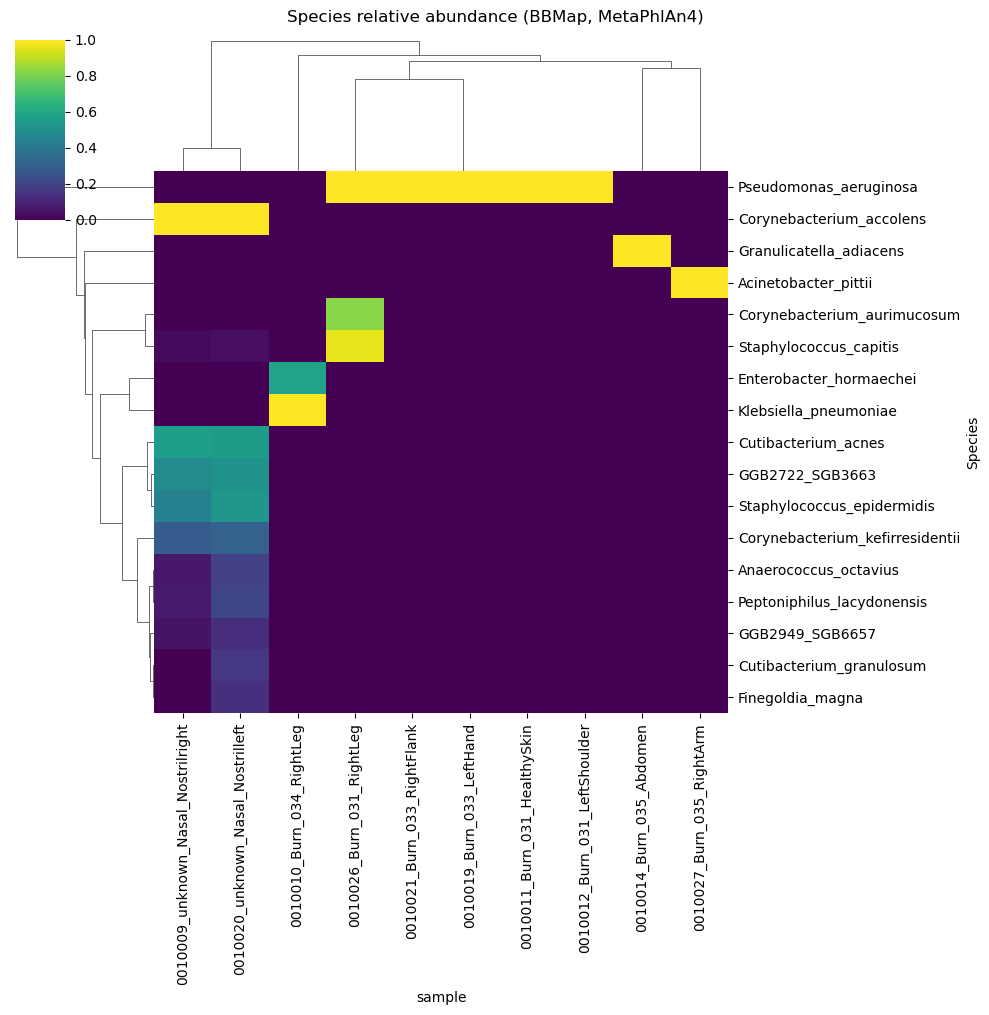

In [29]:
create_clustermap(metaphlan_bbmap, 10, "BBMap, MetaPhlAn4")